![Crowded city](city-1265055_1280.jpg)

In the quest for efficiency and effectiveness in urban transportation, finding the optimal routes to take passengers from their initial locations to their desired destinations is paramount. This challenge is not just about reducing travel time; it's about enhancing the overall experience for both drivers and passengers, ensuring safety, and minimizing environmental impact. 

You have been asked to revolutionize the way taxis navigate the urban landscape, ensuring passengers reach their destinations swiftly, safely, and satisfactorily. As an initial step, your goal is to build a reinforcement learning agent that solves this problem within a simulated environment.

## The Taxi-v3 environment
The Taxi-v3 environment is a strategic simulation, offering a grid-based arena where a taxi navigates to address daily challenges akin to those faced by a taxi driver. This environment is defined by a 5x5 grid where the taxi's mission involves picking up a passenger from one of four specific locations (marked as Red, Green, Yellow, and Blue) and dropping them off at another designated spot. The goal is to accomplish this with minimal time on the road to maximize rewards, emphasizing the need for route optimization and efficient decision-making for passenger pickup and dropoff.

### Key Components:
- **Action Space:** Comprises six actions where 0 moves the taxi south, 1 north, 2 east, 3 west, 4 picks up a passenger, and 5 drops off a passenger.
- **Observation Space:** Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations. 
- **Rewards System:** Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.

![Taxi-v3 environment snapshot](Taxi_snap.png)


In [185]:
# Re-run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 

Defaulting to user installation because normal site-packages is not writeable


In [186]:
# Start coding here
# Feel free to add as many cells as you want
def update_q_table(state, action, reward, next_state):
    old_state = q_table[state, action]
    max_state = np.max(q_table[next_state])
    
    q_table[state, action] = (1 - alpha) * old_state + alpha * (reward + gamma * max_state)

In [187]:
episode_returns = []
num_episode = 2000
q_table = np.zeros((env.observation_space.n, env.action_space.n))
policy = {}
frames = []
episode_total_reward = 0

alpha = 0.8
gamma = 0.7
epsilon = 0.2

In [188]:
for episode in range(num_episode):
    total_reward = 0
    state, info = env.reset()
    
    for _ in range(max_actions):
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
            
        next_state, reward, done, _, _ = env.step(action)
        update_q_table(state, action, reward, next_state)
        total_reward += reward
        
        if done:
            break
        
        state = next_state
    
    episode_returns.append(total_reward)

In [189]:
policy = {state: np.argmax(q_table[state]) for state in range(env.observation_space.n)}

list(policy.items())[:5]

[(0, 0), (1, 4), (2, 4), (3, 4), (4, 2)]

In [190]:
# Testing agent's learned policy
epsilon = 0 # Set epsilon to 0 to ensure it exploits instead of explores

state, info = env.reset()

for _ in range(16):
    action = policy[state]
    next_state, reward, done, _, _ = env.step(action)
    episode_total_reward += reward
    frames.append(env.render())
    
    if done:
        break
        
    state = next_state
    
episode_total_reward

12

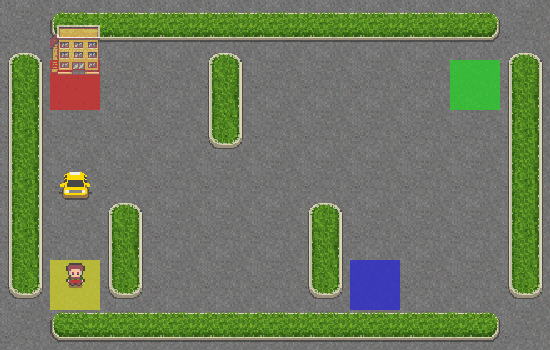

In [191]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path) 